In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


from sklearn.preprocessing import StandardScaler

In [27]:
pima = pd.read_csv("./abcW_3.csv")
pima.head()

''' reverse the rows in pandas '''
reverse_stockseq = pima.iloc[::-1]
reverse_stockseq.head()


,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target,CLOSE,Date
299,0.11,-0.89,0.1,0,0,1,0,-0.25,0,263.5,1
298,0.21,-0.79,1.1,0,0,1,0,-0.10,0,263.5,2
297,0.11,1.11,1.8,0,0,-1,0,0.35,0,265.0,3
296,0.16,-0.84,1.4,-1,0,1,1,0.45,0,262.5,4
295,-0.04,0.96,0.5,0,0,-1,0,0.75,-1,263.0,5


In [51]:
X = reverse_stockseq.iloc[0:299, 0:8].values # Features
y = reverse_stockseq.iloc[0:299, 8:9].values  # Target variable
#x
#y
X_train1=X
y_train1=y 

#X_test1 = X
#y_test1 = y



# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)



X_train = X_train1[0:250]
y_train = y_train1[0:250]

X_test = X_test1[250:] 
y_test = y_test1[250:] 

X_train1=X
y_train1=y

#X_train
#y_train
#X_test
#y_test

In [40]:
close_array = reverse_stockseq['CLOSE'].values
close_array

array([263.5, 263.5, 265. , 262.5, 263. , 257.5, 260. , 254. , 250. ,
       243.5, 244. , 227.5, 237. , 230.5, 237. , 238.5, 236.5, 236. ,
       237. , 230. , 229.5, 219.5, 221. , 222.5, 223. , 234. , 235.5,
       236.5, 235. , 234.5, 234. , 236.5, 231. , 231.5, 227.5, 228.5,
       231. , 226. , 222. , 218. , 219. , 219. , 218.5, 223. , 224. ,
       226.5, 229. , 225.5, 235. , 234. , 226. , 220. , 221. , 219. ,
       222.5, 226.5, 226. , 222.5, 223.5, 222.5, 225.5, 221. , 223.5,
       221.5, 220. , 217.5, 216.5, 223. , 225.5, 219.5, 215.5, 208. ,
       213. , 211. , 215.5, 216. , 220.5, 218.5, 221. , 217.5, 220.5,
       218.5, 221. , 223. , 220.5, 222.5, 226. , 229. , 222.5, 221. ,
       228. , 230. , 229. , 227. , 227. , 230. , 229. , 234.5, 236.5,
       236.5, 238. , 239.5, 239. , 235.5, 233. , 234. , 234. , 230. ,
       230.5, 235.5, 237. , 234.5, 239. , 241. , 240.5, 242. , 245.5,
       248.5, 241.5, 244. , 241.5, 242. , 245.5, 245.5, 246. , 246.5,
       253. , 254. ,

In [41]:
Target_array = reverse_stockseq['Target'].values
Target_array

array([ 0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  1, -1,  1,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1, -1,  0, -1,
        0,  1, -1, -1, -1,  0,  0,  0,  1,  0,  1,  1, -1,  1,  0, -1, -1,
        0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,  0, -1,  0,  1,  1,
       -1, -1, -1,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  1,  0, -1,  0,
        1,  1, -1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,
       -1, -1,  0,  0, -1,  0,  1,  0, -1,  1,  0,  0,  0,  1,  1, -1,  1,
       -1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  1, -1,  1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1, -1,  1, -1,  1,  0,  0,  0,  0,  1,  1, -1,  0, -1,  1,  1,
        0, -1, -1, -1,  1,  1,  0,  1, -1, -1, -1,  1,  0,  1,  0, -1,  0,
        0,  0,  0,  1,  1,  0,  1,  0, -1,  0,  1,  1,  0,  0,  0, -1,  0,
        0,  0, -1, -1, -1,  0,  0,  1,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

In [42]:
print('Total number of days in the dataset: {}'.format(len(Target_array)))

Total number of days in the dataset: 300


In [55]:
scaler = StandardScaler()
scaled_close_dataset = scaler.fit_transform(Target_array.reshape(-1, 1))
scaled_close_dataset

array([[-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-1.52483829],
       [-0.07261135],
       [-1.52483829],
       [-1.52483829],
       [-1.52483829],
       [-0.07261135],
       [-1.52483829],
       [ 1.3796156 ],
       [-1.52483829],
       [ 1.3796156 ],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-1.52483829],
       [-0.07261135],
       [-1.52483829],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [ 1.3796156 ],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [ 1.3796156 ],
       [-1.52483829],
       [-0.07261135],
       [-1.52483829],
       [-0.07261135],
       [ 1.3796156 ],
       [-1.52483829],
       [-1.52483829],
       [-1.52483829],
       [-0.07261135],
       [-0.07261135],
       [-0.07261135],
       [ 1.3796156 ],
       [-0.07261135],
       [ 1.3796156 ],
       [ 1

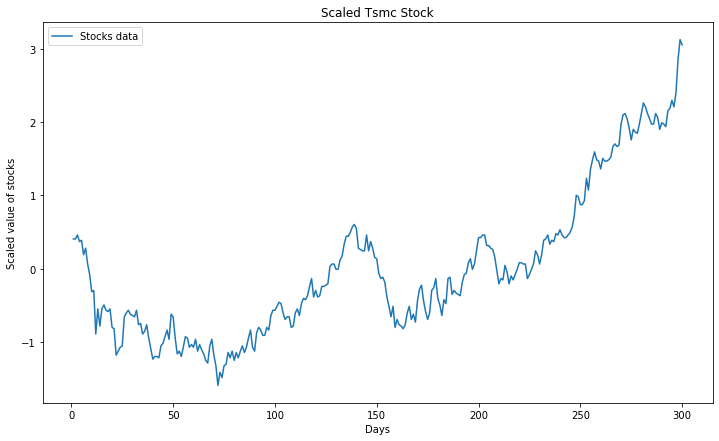

In [44]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled Tsmc Stock')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')

plt.plot(reverse_stockseq.Date, scaled_close_dataset, label='Stocks data')
plt.legend() #左上標示
plt.show()

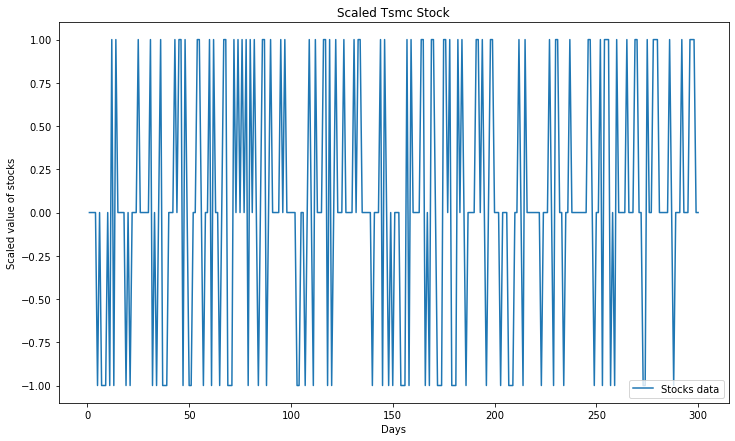

In [45]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled Tsmc Stock')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')

plt.plot(reverse_stockseq.Date, Target_array, label='Stocks data')
plt.legend() #左上標示
plt.show()

In [46]:
#參數設定
learning_rate=0.001
batch_size=8  
epochs = 200
rnn_size=512
number_of_layers=1
number_of_classes=1
window_size=7  

In [47]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size]) # 前n筆資料訓練
        y.append(data[i+window_size])   # 最後一筆預測
        
        i += 1
    assert len(X) ==  len(y)  #做完所有資料return
    return X, y

In [58]:
X, y = window_data(scaled_close_dataset, window_size)  #切 X, y

In [59]:
import numpy as np
#將前250筆作為訓練資料，251~300作為測試資料
X_train  = np.array(X[0:250])
y_train = np.array(y[0:250])

X_test = np.array(X[250:])
y_test = np.array(y[250:])

#X shape (700, 7, 1) 700筆資料, 每一筆資料有七個close price
#y shape (700, 1) 700筆資料, 每一筆資料有一個close price
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (250, 7, 1)
y_train size: (250, 1)
X_test size: (43, 7, 1)
y_test size: (43, 1)


In [60]:
#rnn_size 是LSTM內neuron的數量
#若想堆疊堆多層LSTM使用tf.contrib.rnn.MultiRNNCell
#LSTM起始時init_state內沒有資料，先給初始值0

def get_RNN(rnn_size, keep_prob):
#BasicRNN_layer = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    BasicRNN_layer = tf.nn.rnn_cell.BasicLSTMCell(rnn_size)
#RNN_layer = tf.contrib.rnn.DropoutWrapper(BasicRNN_layer, output_keep_prob=keep_prob)
    RNN_layer = tf.nn.rnn_cell.DropoutWrapper(BasicRNN_layer, output_keep_prob=keep_prob)
    return RNN_layer

def LSTM_cell(rnn_size, X, number_of_layers, keep_prob):    
    cell = tf.nn.rnn_cell.MultiRNNCell([get_RNN(rnn_size, keep_prob) for _ in range(number_of_layers)])
    init_state = cell.zero_state(tf.shape(X)[0], tf.float32)
    return cell, init_state

In [61]:
def output_layer(lstm_output, out_size):
    x = lstm_output[:, -1, :]   
    output = tf.layers.dense(inputs= x, units= out_size) 
    return output

In [62]:
# RNN及LSTM會有梯度爆炸的問題，因此若斜率超過+-5則clip到+-5之內
def opt_loss(logits, targets, learning_rate):
    
    loss = tf.reduce_mean(tf.pow(logits - targets, 2))
    
    #Cliping the gradient loss
    optimizer = tf.train.AdamOptimizer(learning_rate)
    gradients = optimizer.compute_gradients(loss)

    capped_gradients = [(tf.clip_by_value(grad, -5, 5), var) for grad, var in gradients if grad is not None]
    
    train_optimizer = optimizer.apply_gradients(capped_gradients)

    
    return loss, train_optimizer

In [63]:
main_graph = tf.Graph()
sess = tf.Session(graph=main_graph)

with main_graph.as_default():
    
    ##defining placeholders##
    with tf.name_scope('input'):
        inputs = tf.placeholder(tf.float32, [None, window_size, 1], name='input_data')
        targets = tf.placeholder(tf.float32, [None, 1], name='targets')
        keep_prob = tf.placeholder(tf.float32, name='keep_prob')
        
    ##LSTM layer##
    with tf.variable_scope("LSTM_layer"):
        cell, init_state = LSTM_cell(rnn_size, inputs, number_of_layers, keep_prob) 
        outputs, states = tf.nn.dynamic_rnn(cell, inputs, initial_state=init_state)
    
    ##Output layer##   
    with tf.variable_scope('output_layer'):
        logits = output_layer(outputs, number_of_classes)
    
    ##loss and optimization##
    with tf.name_scope('loss_and_opt'):
        loss, opt = opt_loss(logits, targets, learning_rate)
    
    init = tf.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [64]:
sess.run(init)

In [65]:
for i in range(epochs):
    batch_index = 0
    epoch_loss = []
    while(batch_index + batch_size) <= len(X_train):
        X_batch = X_train[batch_index:batch_index+batch_size]
        y_batch = y_train[batch_index:batch_index+batch_size]
        batch_loss, _ = sess.run([loss, opt], feed_dict={inputs:X_batch, targets:y_batch, keep_prob: 0.8})
        epoch_loss.append(batch_loss)
        batch_index += batch_size
    if (i % 30) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/200  Current loss: 1.0525212287902832
Epoch 30/200  Current loss: 0.7055901885032654
Epoch 60/200  Current loss: 0.41054779291152954
Epoch 90/200  Current loss: 0.30152252316474915
Epoch 120/200  Current loss: 0.27024874091148376
Epoch 150/200  Current loss: 0.253460168838501
Epoch 180/200  Current loss: 0.23699796199798584


In [19]:
#Training set預測結果
training_set_pred = np.array([])
for i in range(len(X_train)):
    o = sess.run(logits, feed_dict={inputs:[X_train[i]], keep_prob: 1.0})
    training_set_pred = np.append(training_set_pred, o)

In [20]:
training_set_pred 

array([-6.26015246e-01, -1.42160583e+00,  2.75247432e-02, -1.66100502e+00,
        1.38346493e+00, -1.58791733e+00,  1.47352242e+00, -1.10072941e-01,
       -1.52492255e-01, -9.09248143e-02, -7.93448612e-02, -5.58115263e-03,
       -1.61759600e-01, -1.97513354e+00, -6.26015246e-01, -2.69769162e-01,
       -6.99996352e-02, -4.14064676e-02, -1.84480041e-01, -7.64891505e-01,
        8.08709443e-01, -7.72610959e-03,  4.27354693e-01, -1.11838683e-01,
       -1.47697198e+00, -2.63175517e-02, -1.56581628e+00,  1.08010657e-01,
        1.11521113e+00, -1.68976200e+00, -1.42624998e+00, -1.48527050e+00,
       -1.95565727e-03, -7.35675246e-02,  2.67622545e-02,  1.24490488e+00,
       -2.80245334e-01,  1.29431045e+00,  9.86871481e-01, -6.44849956e-01,
        1.36495018e+00, -3.38769078e-01, -1.54514134e+00, -1.43860292e+00,
        7.61608407e-02, -4.81180400e-01,  1.43490326e+00,  1.28204405e+00,
       -1.64865881e-01, -1.81451690e+00,  3.08369659e-02, -2.02966958e-01,
        1.51309896e+00, -

In [21]:
#Testing set預測結果
testing_set_pred = np.array([])
for i in range(len(X_test)):
    o = sess.run(logits, feed_dict={inputs:[X_test[i]], keep_prob: 1.0})
    testing_set_pred = np.append(testing_set_pred, o)

In [22]:
#把資料放到list裡面準備畫圖
#因為我們是用前七天預測第8天股價，故前七天設為None
training = [None]*window_size
for i in range(len(X_train)):
    training.append(training_set_pred[i])
testing = [None] * (window_size + len(X_train))
testing_loss = 0
for i in range(len(X_test)):
    testing.append(testing_set_pred[i])
    testing_loss += (testing_set_pred[i] - y_test[i])**2
    training.append(None)
print('testing loss:', testing_loss / len(X_test))
#print("mae:  ", metrics.mean_absolute_error(training_set_pred ,testing_set_pred))


testing loss: [1.88985603]


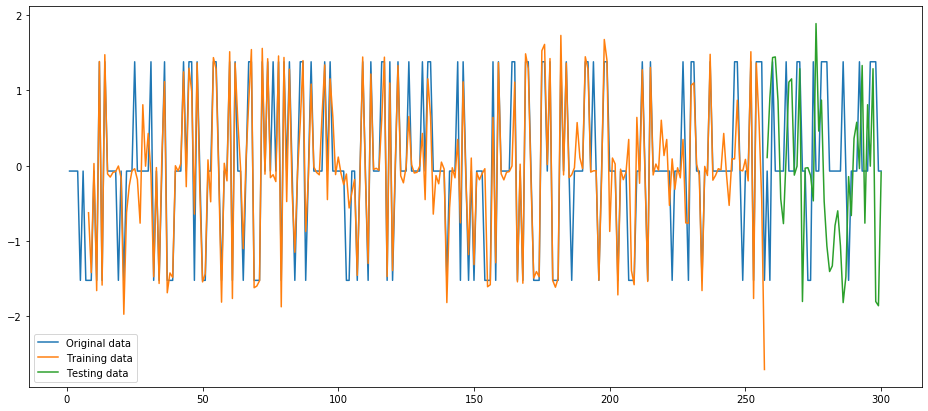

In [23]:
plt.figure(figsize=(16, 7))
plt.plot(reverse_stockseq.Date, scaled_close_dataset, label='Original data')
plt.plot(reverse_stockseq.Date, training, label='Training data')
plt.plot(reverse_stockseq.Date, testing, label='Testing data')
plt.legend()
plt.show()